In [33]:
# Classifing MNIST images with a vanilla network in keras
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow import keras
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [2]:
mnist = fetch_openml('mnist_784') # already flatten

In [24]:
#sample = np.random.randint(70000, size=20000)
data = mnist.data #[sample]
target = mnist.target #[sample]

In [25]:
print(data.shape)
print(target.shape)

(70000, 784)
(70000,)


In [26]:
# we renormalized the data around 0 [-0.5, 0.5] rather than using the interval [0, 255]
norm_data = (data / 255) - 0.5
print(norm_data.shape)

(70000, 784)


In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(data, target, train_size=0.8)

In [28]:
# Building the model: 3 layers
model_3l_5e = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

In [29]:
model_3l_5e.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 55,050
Trainable params: 55,050
Non-trainable params: 0
_________________________________________________________________


In [30]:
# Compiling the model with classic hyperparameters
model_3l_5e.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [39]:
# Training the model: 5 epochs
model_3l_5e.fit(
  xtrain,
  to_categorical(ytrain),
  epochs=5,
  batch_size=32,
)

Epoch 1/5
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0917 - accuracy: 0.9749
Epoch 2/5
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0908 - accuracy: 0.9743
Epoch 3/5
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0865 - accuracy: 0.9761
Epoch 4/5
1750/1750 [==============================] - 3s 2ms/step - loss: 0.0799 - accuracy: 0.9782
Epoch 5/5
1750/1750 [==============================] - 4s 2ms/step - loss: 0.0805 - accuracy: 0.9774: 0s - l


In [40]:
# Testing the model.
score = model_3l_5e.evaluate(
  xtest,
  to_categorical(ytest)
)
print('this model achieved {:.2f} test loss and {:.2f} % accuracy'.format(score[0], score[1]))

438/438 [==============================] - 0s 1ms/step - loss: 0.1710 - accuracy: 0.9646
this model achieved 0.17 test loss and 0.96 % accuracy


In [44]:
# Store the predictions
predictions = model_3l_5e.predict(xtest) # It contains a 10D array with the probability for each category (i.e. numbers from 0 to 9)
predicted = np.argmax(predictions, axis=1) # we recover the most probable number

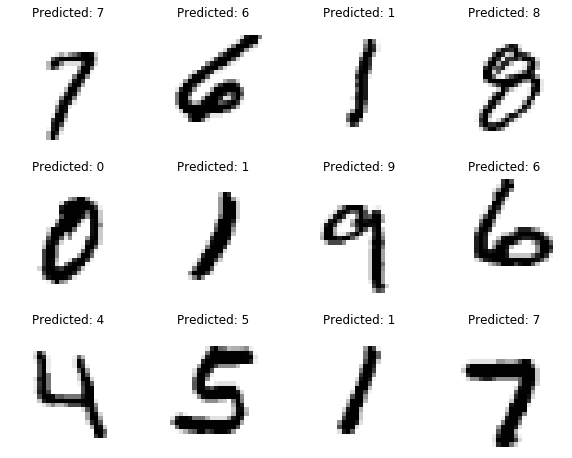

In [45]:
# We transform the data in form of images
images = xtest.reshape((-1, 28, 28))

# We randomly pick 12 images
select = np.random.randint(images.shape[0], size=12)

fig = plt.figure(figsize=(10,8))
# We plot the images with their prediction
for index, value in enumerate(select):
    fig.add_subplot(3,4,index+1)
    plt.axis('off')
    plt.imshow(images[value],cmap=plt.cm.gray_r,interpolation="nearest")
    plt.title('Predicted: {}'.format(predicted[value]))


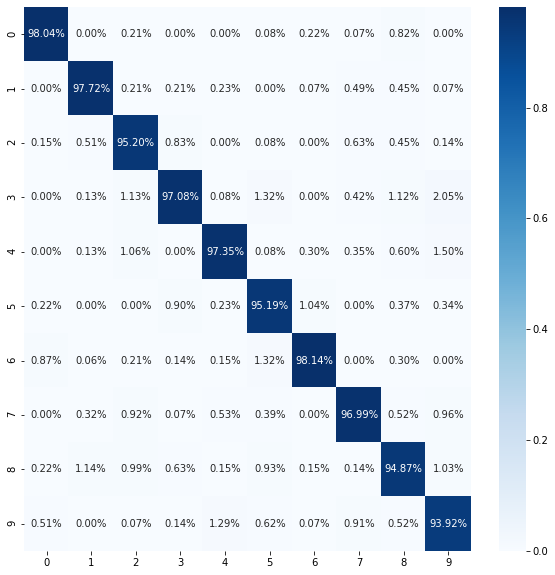

In [46]:
# ytest contains string numbers which have to be converted:
ytest = ytest.astype(np.float)
# On a more quantitative level we can plot the confusion matrix
cf_matrix = confusion_matrix(ytest, predicted)
plt.figure(figsize=(10,10))
sns.heatmap(cf_matrix / sum(cf_matrix), fmt = '.2%', annot=True, cmap='Blues')

In [47]:
# Let's try a deeper model on 10 epochs:
model_5l_h10 = Sequential([
  Dense(64, activation='relu', input_shape=(784,)),
  Dense(64, activation='relu'),
  Dense(64, activation='relu'),
  Dense(64, activation='relu'),
  Dense(10, activation='softmax'),
])

In [48]:
# Compiling the model with classic hyperparameters
model_5l_h10.compile(
  optimizer='adam',
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

In [49]:
# Training the model: 10 epochs
model_5l_h10.fit(
  xtrain,
  to_categorical(ytrain),
  epochs=10,
  batch_size=64,
)

Epoch 1/10
875/875 [==============================] - 3s 3ms/step - loss: 0.8949 - accuracy: 0.8294
Epoch 2/10
875/875 [==============================] - 2s 2ms/step - loss: 0.2441 - accuracy: 0.9291
Epoch 3/10
875/875 [==============================] - 2s 2ms/step - loss: 0.1859 - accuracy: 0.9450
Epoch 4/10
875/875 [==============================] - 2s 2ms/step - loss: 0.1550 - accuracy: 0.9534
Epoch 5/10
875/875 [==============================] - 2s 2ms/step - loss: 0.1319 - accuracy: 0.9604: 0s - loss: 0.1319 - accuracy: 0.96
Epoch 6/10
875/875 [==============================] - 2s 2ms/step - loss: 0.1233 - accuracy: 0.9637
Epoch 7/10
875/875 [==============================] - 2s 2ms/step - loss: 0.1070 - accuracy: 0.9675
Epoch 8/10
875/875 [==============================] - 2s 2ms/step - loss: 0.0935 - accuracy: 0.9715
Epoch 9/10
875/875 [==============================] - 2s 2ms/step - loss: 0.0879 - accuracy: 0.9734
Epoch 10/10
875/875 [==============================] - 2s 2ms/st

In [50]:
# Testing the model.
score = model_5l_h10.evaluate(
  xtest,
  to_categorical(ytest)
)
print('this model achieved {:.2f} test loss and {:.2f} % accuracy'.format(score[0], score[1]))

438/438 [==============================] - 1s 1ms/step - loss: 0.1551 - accuracy: 0.9579
this model achieved 0.16 test loss and 0.96 % accuracy
